In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
from pathlib import Path

/home/mmiihkin/miniconda3/envs/scanpy311/lib/python3.11/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
# BBKNN emani
file_path = Path.home() / "Downloads" / "GSE261983_integrated2.h5ad"

# Load the AnnData object
adata = sc.read_h5ad(file_path)

/home/mmiihkin/miniconda3/envs/scanpy311/lib/python3.11/site-packages/anndata/_io/h5ad.py:267: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  return AnnData(**{


In [82]:
adata.obs.columns

Index(['doublet_score', 'is_doublet', 'n_genes', 'n_genes_by_counts',
       'pct_counts_mt', 'total_counts', 'total_counts_mt', 'bbknn_leiden',
       'sample', 'RNA_snn_res.0.5', 'RNA_snn_res.1', 'RNA_snn_res.1.5',
       'RNA_snn_res.2', 'seurat_clusters', 'RNA_snn_res.2.5',
       'integrated_snn_k5_res.2.5', 'leiden_k5_res_2.5',
       'integrated_snn_k10_res.2.5', 'leiden_k10_res_2.5',
       'integrated_snn_k15_res.2.5', 'leiden_k15_res_2.5',
       'integrated_snn_k20_res.2.5', 'leiden_k20_res_2.5',
       'integrated_snn_k30_res.2.5', 'leiden_k30_res_2.5',
       'integrated_snn_k50_res.2.5', 'leiden_k50_res_2.5'],
      dtype='object')

In [3]:
col = "RNA_snn_res.0.5"
adata.obs[col] = adata.obs[col].round().astype("int64").astype("category")

col = "RNA_snn_res.1"
adata.obs[col] = adata.obs[col].round().astype("int64").astype("category")

col = "RNA_snn_res.1.5"
adata.obs[col] = adata.obs[col].round().astype("int64").astype("category")

col = "RNA_snn_res.2"
adata.obs[col] = adata.obs[col].round().astype("int64").astype("category")

col = "RNA_snn_res.2.5"
adata.obs[col] = adata.obs[col].round().astype("int64").astype("category")

col = "leiden_k5_res_2.5"
adata.obs[col] = adata.obs[col].round().astype("int64").astype("category")

col = "leiden_k10_res_2.5"
adata.obs[col] = adata.obs[col].round().astype("int64").astype("category")

col = "leiden_k15_res_2.5"
adata.obs[col] = adata.obs[col].round().astype("int64").astype("category")

col = "leiden_k20_res_2.5"
adata.obs[col] = adata.obs[col].round().astype("int64").astype("category")

col = "leiden_k50_res_2.5"
adata.obs[col] = adata.obs[col].round().astype("int64").astype("category")



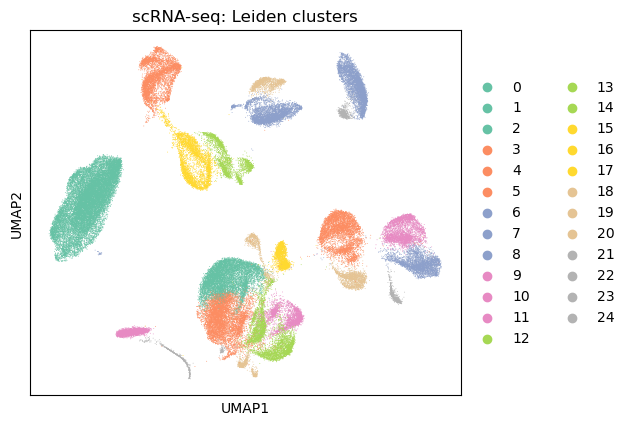

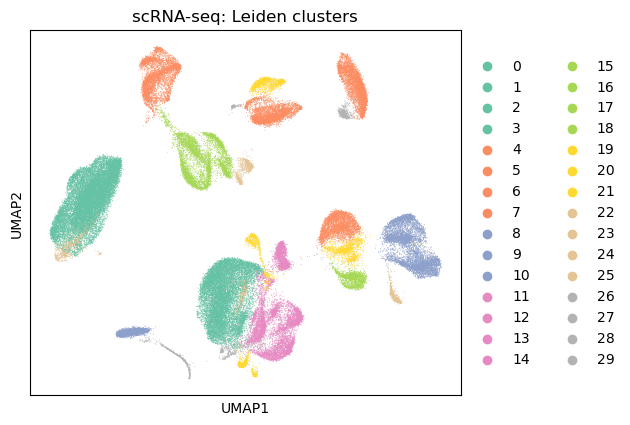

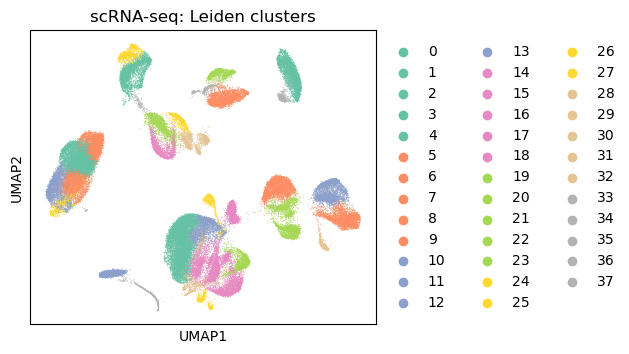

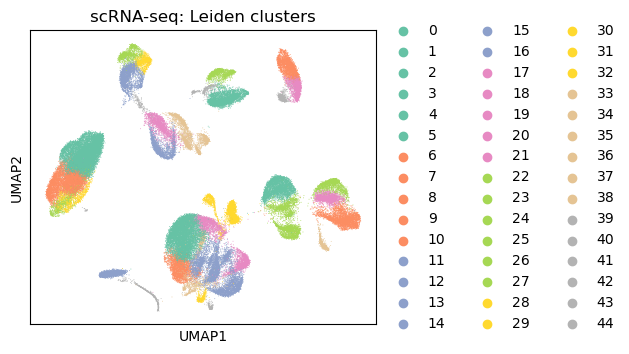

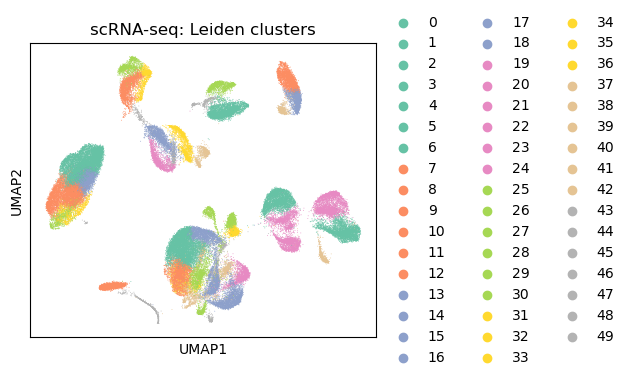

In [61]:
ax = sc.pl.umap(
    adata,
    color="RNA_snn_res.0.5",
    palette="Set2",
    legend_loc="right margin",
    title="scRNA-seq: Leiden clusters",
    show=False
)

import matplotlib.pyplot as plt
# Rasterize only the point cloud(s)
for coll in ax.collections:
    coll.set_rasterized(True)

plt.tight_layout()
ax.set_aspect("equal")
plt.savefig("umap_BBKNN_leiden_res05.svg", bbox_inches="tight")
plt.show()

ax = sc.pl.umap(
    adata,
    color="RNA_snn_res.1",
    palette="Set2",
    legend_loc="right margin",
    title="scRNA-seq: Leiden clusters",
    show=False
)

import matplotlib.pyplot as plt
# Rasterize only the point cloud(s)
for coll in ax.collections:
    coll.set_rasterized(True)

plt.tight_layout()
ax.set_aspect("equal")
plt.savefig("umap_BBKNN_leiden_res10.svg", bbox_inches="tight")
plt.show()

ax = sc.pl.umap(
    adata,
    color="RNA_snn_res.1.5",
    palette="Set2",
    legend_loc="right margin",
    title="scRNA-seq: Leiden clusters",
    show=False
)

import matplotlib.pyplot as plt
# Rasterize only the point cloud(s)
for coll in ax.collections:
    coll.set_rasterized(True)

plt.tight_layout()
ax.set_aspect("equal")
plt.savefig("umap_BBKNN_leiden_res15.svg", bbox_inches="tight")
plt.show()

ax = sc.pl.umap(
    adata,
    color="RNA_snn_res.2",
    palette="Set2",
    legend_loc="right margin",
    title="scRNA-seq: Leiden clusters",
    show=False
)

import matplotlib.pyplot as plt
# Rasterize only the point cloud(s)
for coll in ax.collections:
    coll.set_rasterized(True)

plt.tight_layout()
ax.set_aspect("equal")
plt.savefig("umap_BBKNN_leiden_res20.svg", bbox_inches="tight")
plt.show()

ax = sc.pl.umap(
    adata,
    color="RNA_snn_res.2.5",
    palette="Set2",
    legend_loc="right margin",
    title="scRNA-seq: Leiden clusters",
    show=False
)

import matplotlib.pyplot as plt
# Rasterize only the point cloud(s)
for coll in ax.collections:
    coll.set_rasterized(True)

plt.tight_layout()
ax.set_aspect("equal")
plt.savefig("umap_BBKNN_leiden_res25.svg", bbox_inches="tight")
plt.show()


In [96]:
# Python/Scanpy translation of the R code (AnnData + pandas/numpy/matplotlib)
# -----------------------------------------------------------------------------
# Requirements:
#   pip install scanpy anndata pandas numpy matplotlib
#
# Assumptions:
#   - You already have an AnnData object `adata`
#   - adata.obs has columns:
#       * 'sample' (sample ID per cell)
#       * 'bbknn_leiden' (cluster label per cell; change if needed)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# -------------------------------
# Helper: Chao2 estimator
# -------------------------------
def calc_chao2_fossil(binary_mat: np.ndarray) -> dict:
    species_counts = binary_mat.sum(axis=0)  # incidence per cluster across samples
    Q1 = int(np.sum(species_counts == 1))
    Q2 = int(np.sum(species_counts == 2))
    S_obs = int(np.sum(species_counts > 0))

    # fossil:::int.chao uses fallback when Q1*Q2 == 0
    if Q1 == 0 or Q2 == 0:
        S_chao2 = float(S_obs + (Q1 * (Q1 - 1)) / (2.0 * (Q2 + 1)))
    else:
        S_chao2 = float(S_obs + (Q1 * Q1) / (2.0 * Q2))

    return {"S_chao2": S_chao2, "S_obs": S_obs, "Q1": Q1, "Q2": Q2}

# -------------------------------
# Main: bootstrap across sample sizes
# -------------------------------
def chao2_stability(
    adata,
    sample_col: str = "sample",
    cluster_col: str = "bbknn_leiden",
    n_boot: int = 500,
    seed: int = 42,
    min_samples: int = 3,
) -> pd.DataFrame:
    """
    Replicates the R workflow:
      For each sample size n_samp, repeatedly subsample samples (without replacement),
      compute presence/absence table sample x cluster, estimate observed clusters and Chao2,
      then summarize mean/sd across bootstraps.
    """
    rng = np.random.default_rng(seed)

    meta = adata.obs[[sample_col, cluster_col]].copy()

    # Optional: drop NA cluster labels to avoid treating NaN as a cluster
    meta = meta.dropna(subset=[cluster_col])

    all_samples = meta[sample_col].unique()
    if len(all_samples) < min_samples:
        raise ValueError(f"Need at least {min_samples} unique samples; found {len(all_samples)}.")

    nsamps = range(min_samples, len(all_samples) + 1)

    rows = []
    for n_samp in nsamps:
        print(f"🔄  Processing sample size {n_samp:2d} / {max(nsamps):2d} …")

        obs_vals = np.empty(n_boot, dtype=float)
        chao2_vals = np.empty(n_boot, dtype=float)

        for b in range(n_boot):
            sel = rng.choice(all_samples, size=n_samp, replace=False)
            submd = meta[meta[sample_col].isin(sel)]

            # Contingency table: sample x cluster
            ctab = pd.crosstab(submd[sample_col], submd[cluster_col])

            # Presence/absence matrix
            binmat = (ctab.values > 0).astype(np.int64)

            ch = calc_chao2(binmat)
            obs_vals[b] = ch["S_obs"]
            chao2_vals[b] = ch["S_chao2"]

        rows.append(
            {
                "sample_size": n_samp,
                "obs_mean": float(np.mean(obs_vals)),
                "obs_sd": float(np.std(obs_vals, ddof=1)),
                "chao2_mean": float(np.mean(chao2_vals)),
                "chao2_sd": float(np.std(chao2_vals, ddof=1)),
            }
        )

    return pd.DataFrame(rows)

# -------------------------------
# Plot (matplotlib) and save SVG
# -------------------------------
def plot_chao2_stability(results: pd.DataFrame, out_svg: str = "Chao2_stability_Yevhen.svg"):
    x = results["sample_size"].to_numpy()

    # Observed clusters
    y_obs = results["obs_mean"].to_numpy()
    y_obs_lo = (results["obs_mean"] - results["obs_sd"]).to_numpy()
    y_obs_hi = (results["obs_mean"] + results["obs_sd"]).to_numpy()

    # Chao2 estimate
    y_chao = results["chao2_mean"].to_numpy()
    y_chao_lo = (results["chao2_mean"] - results["chao2_sd"]).to_numpy()
    y_chao_hi = (results["chao2_mean"] + results["chao2_sd"]).to_numpy()

    fig, ax = plt.subplots(figsize=(6, 6))

    ax.plot(x, y_obs, label="Observed clusters", linewidth=4.0)
    ax.fill_between(x, y_obs_lo, y_obs_hi, alpha=0.2)

    ax.plot(x, y_chao, label="Chao2 estimate", linewidth=4.0)
    ax.fill_between(x, y_chao_lo, y_chao_hi, alpha=0.2)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    ax.set_xlabel("Number of Samples", fontsize = 16)
    ax.set_ylabel("Number of Clusters", fontsize = 16)
    ax.set_title("Stability of Chao2 Completeness Estimation", fontsize = 18)
    ax.tick_params(axis="both", labelsize=14)
    ax.legend(loc="upper left")
    ax.grid(False)

    fig.tight_layout()
    fig.savefig(out_svg, format="svg")
    plt.close(fig)

# -------------------------------
# Example usage
# -------------------------------
# results = chao2_stability(adata, sample_col="sample", cluster_col="bbknn_leiden",
#                           n_boot=500, seed=42, min_samples=3)
# plot_chao2_stability(results, out_svg="Chao2_stability_Yevhen.svg")
# results.to_csv("Chao2_stability_Yevhen.csv", index=False)


In [97]:
results = chao2_stability(adata, sample_col="sample", cluster_col="RNA_snn_res.0.5",
                           n_boot=500, seed=42, min_samples=3)
plot_chao2_stability(results, out_svg="Chao2_stability_BBKNN_res05_fossil.svg")
results.to_csv("Chao2_stability_Chao2_stability_BBKNN_res05_fossil.csv", index=False)

results = chao2_stability(adata, sample_col="sample", cluster_col="RNA_snn_res.1",
                           n_boot=500, seed=42, min_samples=3)
plot_chao2_stability(results, out_svg="Chao2_stability_BBKNN_res10_fossil.svg")
results.to_csv("Chao2_stability_Chao2_stability_BBKNN_res10_fossil.csv", index=False)

results = chao2_stability(adata, sample_col="sample", cluster_col="RNA_snn_res.2",
                           n_boot=500, seed=42, min_samples=3)
plot_chao2_stability(results, out_svg="Chao2_stability_BBKNN_res20_fossil.svg")
results.to_csv("Chao2_stability_Chao2_stability_BBKNN_res20_fossil.csv", index=False)

results = chao2_stability(adata, sample_col="sample", cluster_col="RNA_snn_res.1.5",
                           n_boot=500, seed=42, min_samples=3)
plot_chao2_stability(results, out_svg="Chao2_stability_BBKNN_res15_fossil.svg")
results.to_csv("Chao2_stability_Chao2_stability_BBKNN_res15_fossil.csv", index=False)

🔄  Processing sample size  3 / 17 …
🔄  Processing sample size  4 / 17 …
🔄  Processing sample size  5 / 17 …
🔄  Processing sample size  6 / 17 …


KeyboardInterrupt: 

In [98]:
results = chao2_stability(adata, sample_col="sample", cluster_col="leiden_k5_res_2.5",
                           n_boot=500, seed=42, min_samples=3)
plot_chao2_stability(results, out_svg="Chao2_stability_BBKNN_res25_k5_fossil.svg")
results.to_csv("Chao2_stability_BBKNN_res25_k5_fossil.csv", index=False)

results = chao2_stability(adata, sample_col="sample", cluster_col="leiden_k10_res_2.5",
                           n_boot=500, seed=42, min_samples=3)
plot_chao2_stability(results, out_svg="Chao2_stability_BBKNN_res25_k10_fossil.svg")
results.to_csv("Chao2_stability_BBKNN_res25_k10_fossil.csv", index=False)

results = chao2_stability(adata, sample_col="sample", cluster_col="leiden_k20_res_2.5",
                           n_boot=500, seed=42, min_samples=3)
plot_chao2_stability(results, out_svg="Chao2_stability_BBKNN_res25_k20_fossil.svg")
results.to_csv("Chao2_stability_BBKNN_res25_k20_fossil.csv", index=False)

results = chao2_stability(adata, sample_col="sample", cluster_col="leiden_k50_res_2.5",
                           n_boot=500, seed=42, min_samples=3)
plot_chao2_stability(results, out_svg="Chao2_stability_BBKNN_res25_k50_fossil.svg")
results.to_csv("Chao2_stability_BBKNN_res25_k50_fossil.csv", index=False)


🔄  Processing sample size  3 / 17 …
🔄  Processing sample size  4 / 17 …
🔄  Processing sample size  5 / 17 …
🔄  Processing sample size  6 / 17 …
🔄  Processing sample size  7 / 17 …
🔄  Processing sample size  8 / 17 …
🔄  Processing sample size  9 / 17 …
🔄  Processing sample size 10 / 17 …
🔄  Processing sample size 11 / 17 …
🔄  Processing sample size 12 / 17 …
🔄  Processing sample size 13 / 17 …
🔄  Processing sample size 14 / 17 …
🔄  Processing sample size 15 / 17 …
🔄  Processing sample size 16 / 17 …
🔄  Processing sample size 17 / 17 …
🔄  Processing sample size  3 / 17 …
🔄  Processing sample size  4 / 17 …
🔄  Processing sample size  5 / 17 …
🔄  Processing sample size  6 / 17 …
🔄  Processing sample size  7 / 17 …
🔄  Processing sample size  8 / 17 …
🔄  Processing sample size  9 / 17 …
🔄  Processing sample size 10 / 17 …
🔄  Processing sample size 11 / 17 …
🔄  Processing sample size 12 / 17 …
🔄  Processing sample size 13 / 17 …
🔄  Processing sample size 14 / 17 …
🔄  Processing sample size 15

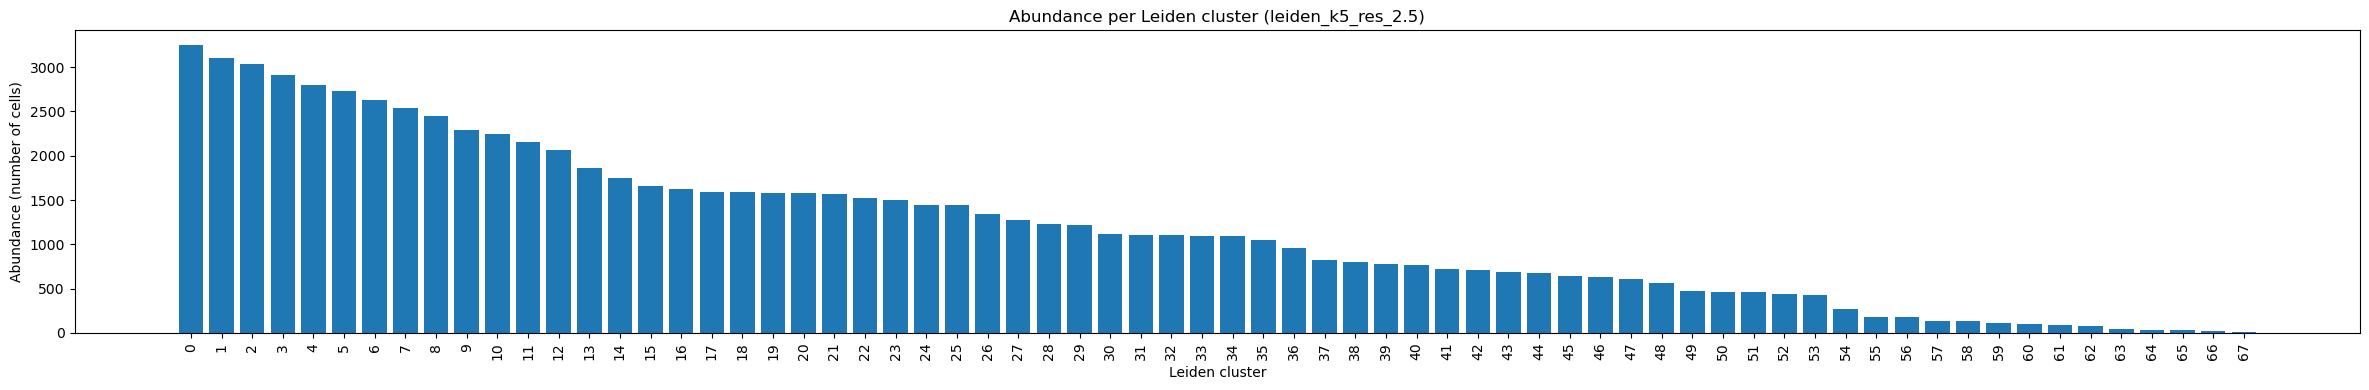

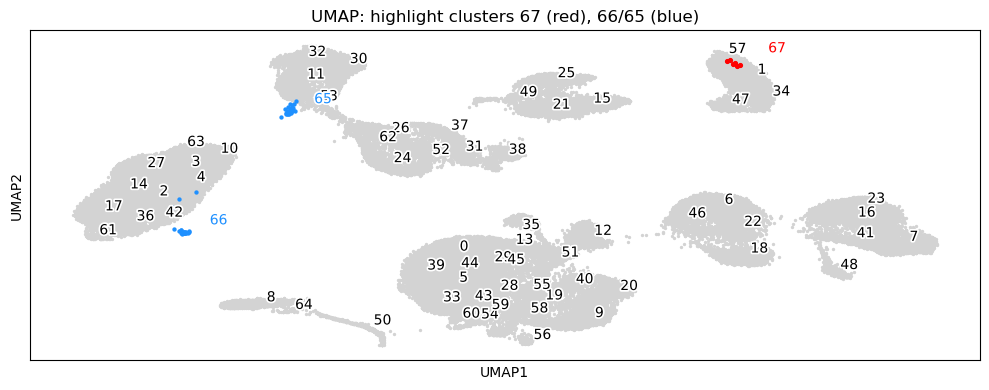

<Figure size 640x480 with 0 Axes>

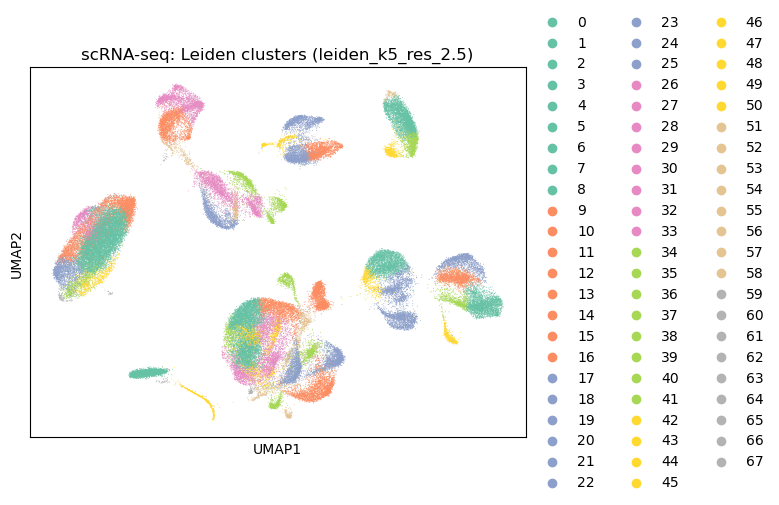

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import matplotlib.patheffects as pe

# =========================================================
# 1) Barplot: abundance (cell count) per Leiden cluster
# =========================================================
cluster_key = "leiden_k5_res_2.5"

counts = adata.obs[cluster_key].value_counts()
try:
    counts = counts.reindex(sorted(counts.index, key=lambda x: int(str(x))))
except Exception:
    counts = counts.sort_index()

fig, ax = plt.subplots(figsize=(max(8, 0.35 * len(counts)), 4))
ax.bar(counts.index.astype(str), counts.values)
ax.set_xlabel("Leiden cluster")
ax.set_ylabel("Abundance (number of cells)")
ax.set_title("Abundance per Leiden cluster (leiden_k5_res_2.5)")
ax.tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

# =========================================================
# 2) UMAP: highlight 67 (red) and 66/65 (blue)
# =========================================================
highlight_red = ["67"]
highlight_blue = ["66", "65"]

adata.obs[cluster_key] = adata.obs[cluster_key].astype("category")

fig, ax = plt.subplots(figsize=(10, 4))

cluster_str = adata.obs[cluster_key].astype(str)

# --- Background: all other clusters ---
mask_background = ~cluster_str.isin(highlight_red + highlight_blue)
sc.pl.umap(
    adata[mask_background].copy(),
    color=None,
    size=8,
    ax=ax,
    show=False
)
if ax.collections:
    ax.collections[-1].set_color("lightgrey")

# --- Blue clusters (66, 65) ---
mask_blue = cluster_str.isin(highlight_blue)
sc.pl.umap(
    adata[mask_blue].copy(),
    color=None,
    size=18,
    ax=ax,
    show=False
)
if ax.collections:
    ax.collections[-1].set_color("dodgerblue")

# --- Red cluster (67) ---
mask_red = cluster_str.isin(highlight_red)
sc.pl.umap(
    adata[mask_red].copy(),
    color=None,
    size=30,
    ax=ax,
    show=False
)
if ax.collections:
    ax.collections[-1].set_color("red")

# ---------------------------------------------------------
# Add cluster numbers (colored to match highlights)
# ---------------------------------------------------------
umap = adata.obsm["X_umap"]
x_all, y_all = umap[:, 0], umap[:, 1]

dx = 0.02 * (np.nanmax(x_all) - np.nanmin(x_all))
dy = 0.02 * (np.nanmax(y_all) - np.nanmin(y_all))

for clust in adata.obs[cluster_key].cat.categories:
    mask = (cluster_str == str(clust)).to_numpy()
    if mask.sum() == 0:
        continue

    x0 = np.median(umap[mask, 0])
    y0 = np.median(umap[mask, 1])

    x_txt, y_txt = x0 + dx, y0 + dy

    # Move highlighted labels slightly further out
    if str(clust) in highlight_red:
        x_txt, y_txt = x0 + 2.5 * dx, y0 + 2.5 * dy
        label_color = "red"
    elif str(clust) in highlight_blue:
        x_txt, y_txt = x0 + 2.0 * dx, y0 + 2.0 * dy
        label_color = "dodgerblue"
    else:
        label_color = "black"

    txt = ax.text(
        x_txt,
        y_txt,
        str(clust),
        fontsize=10,
        weight="normal",
        ha="center",
        va="center",
        color=label_color,
        zorder=3
    )

    txt.set_path_effects([pe.withStroke(linewidth=2.5, foreground="white")])

ax.set_title("UMAP: highlight clusters 67 (red), 66/65 (blue)")

for coll in ax.collections:
    coll.set_rasterized(True)

plt.tight_layout()

fig.savefig(
    "umap_highlight_67_red_66_65_blue.svg",
    dpi=600,
    bbox_inches="tight"
)
fig.savefig(
    "umap_highlight_67_red_66_65_blue.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close(fig)


# ---------------------------------------------------------
# Add cluster numbers with an automatic small offset so they
# don't sit directly on top of the densest points.
# Also: lighter font (no bold) and no filled box.
# ---------------------------------------------------------
umap = adata.obsm["X_umap"]
x_all, y_all = umap[:, 0], umap[:, 1]

# Offset scale in data units (a few % of the UMAP span)
dx = 0.02 * (np.nanmax(x_all) - np.nanmin(x_all))
dy = 0.02 * (np.nanmax(y_all) - np.nanmin(y_all))

for clust in adata.obs[cluster_key].cat.categories:
    mask = (adata.obs[cluster_key] == clust).to_numpy()
    if mask.sum() == 0:
        continue

    # Median is often better than mean for cluster centers
    x0 = np.median(umap[mask, 0])
    y0 = np.median(umap[mask, 1])

    # Default: place slightly above/right of the cluster center
    x_txt, y_txt = x0 + dx, y0 + dy

    # For the highlighted cluster, push label farther away so it doesn't hide red dots
    if str(clust) == str(highlight_cluster):
        x_txt, y_txt = x0 + 2.2 * dx, y0 + 2.2 * dy

    txt = ax.text(
        x_txt,
        y_txt,
        str(clust),
        fontsize=10,          # less heavy-looking
        weight="normal",      # not bold
        ha="center",
        va="center",
        color="black",
        zorder=3              # BELOW points so it won't cover them
    )

    # White outline only (no box), improves readability without hiding points
    txt.set_path_effects([pe.withStroke(linewidth=2.5, foreground="white")])

ax.set_title(f"UMAP: highlight Leiden cluster {highlight_cluster}")

# Rasterize point clouds (keep text vector)
for coll in ax.collections:
    coll.set_rasterized(True)

plt.tight_layout()

fig.savefig(
    f"umap_highlight_cluster_{highlight_cluster}_with_numbers.svg",
    dpi=600,
    bbox_inches="tight"
)
fig.savefig(
    f"umap_highlight_cluster_{highlight_cluster}_with_numbers.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
plt.close(fig)

# =========================================================
# (Optional) original multi-cluster UMAP
# =========================================================
sc.pl.umap(
    adata,
    color=cluster_key,
    palette="Set2",
    legend_loc="right margin",
    title="scRNA-seq: Leiden clusters (leiden_k5_res_2.5)"
)


In [4]:
import pandas as pd

# 1) Load the metadata CSV you created
meta = pd.read_csv("/home/mmiihkin/Downloads/Postmortem_Human_Brain_Control_Cohort_with_GSM_RT_codes.csv")

# 2) Extract RT code from cell IDs (obs_names like "RT00372N#AAAC...-1")
adata.obs["RT_Code"] = adata.obs_names.to_series().str.split("#").str[0]

# (Optional sanity check)
print(adata.obs["RT_Code"].head())

# 3) Ensure unique RT_Code in metadata
meta = meta.drop_duplicates(subset=["RT_Code"]).copy()

# 4) Join (left merge keeps all cells)
# Choose which metadata columns you want to bring in:
cols_to_add = ["RT_Code", "GSM_ID", "Tissue", "Age_at_Death_yrs", "Sex", "PMI_hrs", "Diagnosis"]

adata.obs = adata.obs.merge(
    meta[cols_to_add],
    how="left",
    on="RT_Code"
)

# 5) QC: check matches
print("Cells with missing metadata:", adata.obs["GSM_ID"].isna().sum())
print("Unique RT codes in adata:", adata.obs["RT_Code"].nunique())
print("Unique RT codes matched:", adata.obs.loc[~adata.obs["GSM_ID"].isna(), "RT_Code"].nunique())


RT00372N#AAACAGCCAACTGGGA-1    RT00372N
RT00372N#AAACAGCCAATAAGCA-1    RT00372N
RT00372N#AAACAGCCAATAGTCT-1    RT00372N
RT00372N#AAACAGCCAATGCCTA-1    RT00372N
RT00372N#AAACAGCCACCCACAG-1    RT00372N
Name: RT_Code, dtype: object
Cells with missing metadata: 0
Unique RT codes in adata: 17
Unique RT codes matched: 17


/home/mmiihkin/miniconda3/envs/scanpy311/lib/python3.11/functools.py:909: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


In [108]:
adata.obs

,doublet_score,is_doublet,n_genes,n_genes_by_counts,pct_counts_mt,total_counts,total_counts_mt,bbknn_leiden,sample,RNA_snn_res.0.5,...,leiden_k50_res_2.5,leiden_k5_res_2.5_highlight_40,leiden_k5_res_2.5_highlight_67,RT_Code,GSM_ID,Tissue,Age_at_Death_yrs,Sex,PMI_hrs,Diagnosis
0,0.020277,0,1078,1078,0.457221,4763.230544,21.778473,16,0,17,...,21,Other,Other,RT00372N,GSM8155483,Post mortem human brain,90+,Male,21.5,Control
1,0.008648,0,1794,1794,0.000000,6722.217455,0.000000,6,0,6,...,1,Other,Other,RT00372N,GSM8155483,Post mortem human brain,90+,Male,21.5,Control
2,0.042292,0,1096,1096,0.184919,4706.267465,8.702788,0,0,0,...,0,Other,Other,RT00372N,GSM8155483,Post mortem human brain,90+,Male,21.5,Control
3,0.051225,0,2800,2800,0.136338,9039.228899,12.323942,4,0,4,...,29,Other,Other,RT00372N,GSM8155483,Post mortem human brain,90+,Male,21.5,Control
4,0.074842,0,1369,1369,0.000000,5481.136396,0.000000,3,0,0,...,3,Other,Other,RT00372N,GSM8155483,Post mortem human brain,90+,Male,21.5,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79581,0.094675,0,3641,3641,0.000000,10949.561213,0.000000,18,5,11,...,23,Other,Other,RT00378N,GSM8155489,Post mortem human brain,79,Male,32.0,Control
79582,0.015827,0,1203,1203,0.079251,5155.323183,4.085632,16,5,17,...,21,Other,Other,RT00378N,GSM8155489,Post mortem human brain,79,Male,32.0,Control
79583,0.027431,0,660,660,0.439393,3245.225600,14.259284,0,5,0,...,13,Other,Other,RT00378N,GSM8155489,Post mortem human brain,79,Male,32.0,Control
79584,0.068966,0,2417,2417,0.114547,8528.619896,9.769246,1,5,1,...,26,Other,Other,RT00378N,GSM8155489,Post mortem human brain,79,Male,32.0,Control


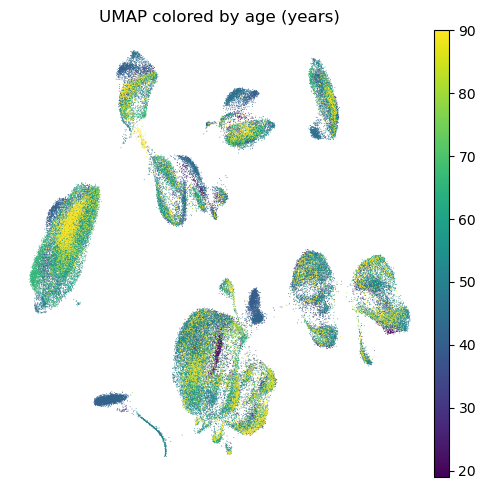

In [41]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

adata.obs["Age_numeric"] = pd.to_numeric(
    adata.obs["Age_at_Death_yrs"].astype(str).str.replace("+", "", regex=False),
    errors="coerce"
)

fig, ax = plt.subplots(figsize=(5, 5))

sc.pl.umap(
    adata,
    color="Age_numeric",
    color_map="viridis",
    title="UMAP colored by age (years)",
    frameon=False,
    ax=ax,
    show=False
)

# rasterize point cloud(s)
for coll in ax.collections:
    coll.set_rasterized(True)

plt.tight_layout()
plt.savefig("umap age.svg", bbox_inches="tight")
plt.show()


Saved: leiden_k10_res_2.5_age_spearman_fdr.csv
   cluster  spearman_rho   p_value  n_donors_with_cluster  mean_fraction  \
0       13     -0.569329  0.017059                     12       0.028474   
1       44     -0.468726  0.057715                      7       0.020143   
2       47     -0.428061  0.086500                      8       0.009578   
3       10     -0.417426  0.095490                      8       0.043493   
4        7     -0.317568  0.214201                     15       0.027808   
5       42     -0.254276  0.324691                      6       0.010126   
6       43     -0.240000  0.353494                     14       0.006540   
7       36     -0.225428  0.384331                      7       0.019785   
8       40     -0.206769  0.425883                     14       0.009873   
9       24     -0.172605  0.507677                     15       0.017049   
10      45     -0.156150  0.549525                      5       0.009321   
11      29     -0.139940  0.592176       

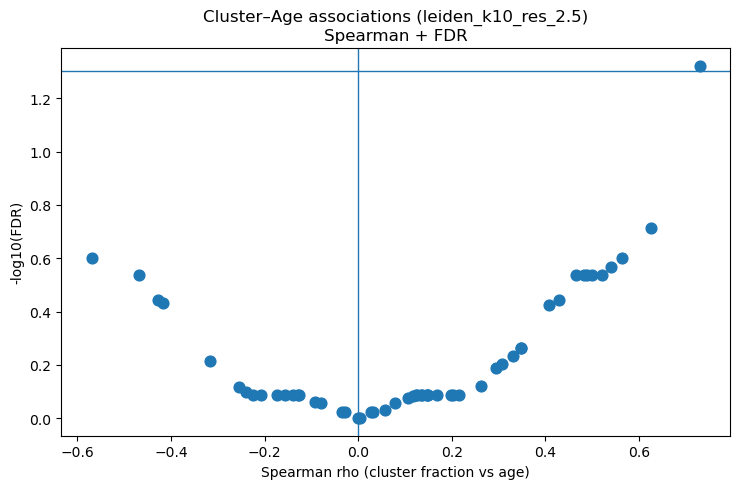

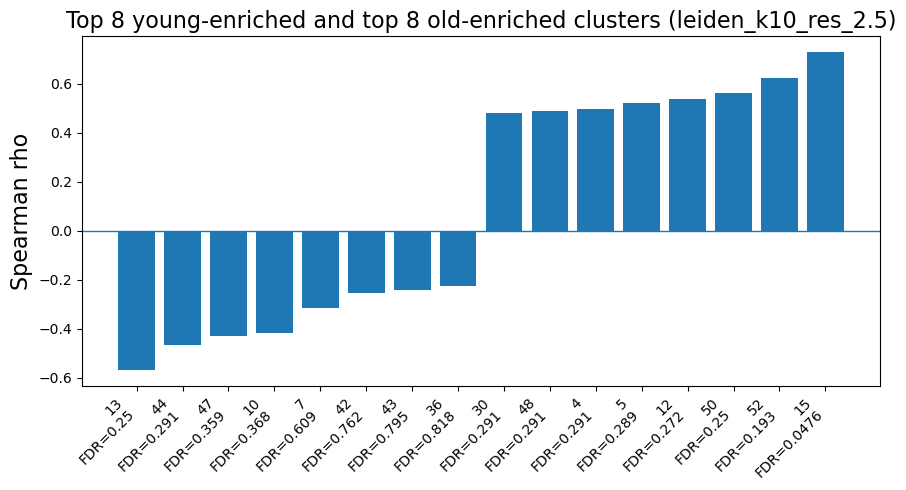

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests

# -----------------------------
# Settings
# -----------------------------
cluster_key = "leiden_k10_res_2.5"
age_col = "Age_at_Death_yrs"
donor_col = "RT_Code"

out_prefix = f"{cluster_key}_age_spearman_fdr"  # used for filenames

# -----------------------------
# 1) Build donor x cluster proportions + donor age
# -----------------------------
df = adata.obs[[donor_col, age_col, cluster_key]].copy()

# numeric age (handles "90+")
df["Age_numeric"] = pd.to_numeric(
    df[age_col].astype(str).str.replace("+", "", regex=False),
    errors="coerce"
)

# drop donors with missing age
df = df.dropna(subset=["Age_numeric"])

# donor x cluster cell counts
ct = pd.crosstab(df[donor_col], df[cluster_key])

# donor x cluster proportions
ct_prop = ct.div(ct.sum(axis=1), axis=0)

# donor ages (aligned to ct_prop rows)
donor_age = df.drop_duplicates(subset=[donor_col]).set_index(donor_col)["Age_numeric"]
ct_prop = ct_prop.join(donor_age.rename("Age_numeric"))

# -----------------------------
# 2) Spearman correlation per cluster + FDR correction
# -----------------------------
results = []
clusters = [c for c in ct_prop.columns if c != "Age_numeric"]

x = ct_prop["Age_numeric"].values  # same x for all clusters

for cl in clusters:
    y = ct_prop[cl].values
    rho, p = spearmanr(x, y)
    results.append((str(cl), rho, p, int((y > 0).sum()), float(y.mean())))

res = pd.DataFrame(
    results,
    columns=["cluster", "spearman_rho", "p_value", "n_donors_with_cluster", "mean_fraction"]
)

# FDR correction (Benjamini–Hochberg)
rej, p_fdr, _, _ = multipletests(res["p_value"].values, method="fdr_bh")
res["p_fdr"] = p_fdr
res["significant_fdr_0_05"] = rej

# Sort: most "young-enriched" first (rho most negative)
res_sorted = res.sort_values(["spearman_rho", "p_fdr"], ascending=[True, True]).reset_index(drop=True)

# Save table
csv_path = f"{out_prefix}.csv"
res_sorted.to_csv(csv_path, index=False)
print(f"Saved: {csv_path}")
print(res_sorted.head(15))

# -----------------------------
# 3) Plot: rho vs -log10(FDR) (volcano-style) + SAVE
# -----------------------------
eps = 1e-300
neglog10_fdr = -np.log10(np.maximum(res_sorted["p_fdr"].values, eps))

fig, ax = plt.subplots(figsize=(7.5, 5))
ax.scatter(res_sorted["spearman_rho"].values, neglog10_fdr, s=60)

ax.axvline(0, linewidth=1)
ax.axhline(-np.log10(0.05), linewidth=1)

ax.set_xlabel("Spearman rho (cluster fraction vs age)")
ax.set_ylabel("-log10(FDR)")
ax.set_title(f"Cluster–Age associations ({cluster_key})\nSpearman + FDR")

plt.tight_layout()
fig.savefig(f"{out_prefix}_volcano.svg", dpi=600, bbox_inches="tight")
fig.savefig(f"{out_prefix}_volcano.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close(fig)

# -----------------------------
# 4) Plot: Top young-enriched + top old-enriched clusters + SAVE
# -----------------------------
N = 8
top_young = res_sorted.nsmallest(N, "spearman_rho")
top_old = res_sorted.nlargest(N, "spearman_rho")
top = pd.concat([top_young, top_old], ignore_index=True).sort_values("spearman_rho")

labels = [f"{r.cluster}\nFDR={r.p_fdr:.3g}" for r in top.itertuples(index=False)]

fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(labels, top["spearman_rho"].values)
ax.axhline(0, linewidth=1)

ax.set_ylabel("Spearman rho", fontsize=16)
ax.set_title(f"Top {N} young-enriched and top {N} old-enriched clusters ({cluster_key})", fontsize=16)
ax.tick_params(axis="x", labelrotation=45)
plt.setp(ax.get_xticklabels(), ha="right")

plt.tight_layout()
fig.savefig(f"{out_prefix}_top_clusters.svg", dpi=600, bbox_inches="tight")
fig.savefig(f"{out_prefix}_top_clusters.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close(fig)
